# Training a Graph Neural Cellular Automata (GNCA) with Measurement Data
This notebook demonstrates how to load measurement data, set up the environment and GNCA model, and train the model using the provided measurements.

In [1]:
import numpy as np
import torch
from environment import Environment
from custon_nca import CustomGNN
import matplotlib.pyplot as plt

In [11]:
# Load measurement data (for chemical A as example)
data = np.load('../data/measurements/measurements_a.npz')
measurements = data['measurements']  # shape: (timesteps, num_coords)
coords = data['coords']              # shape: (num_coords, 2)
n = int(data['n'])                   # time interval

# Use the last timepoint as the target for each coordinate
node_positions = coords.astype(np.float32)

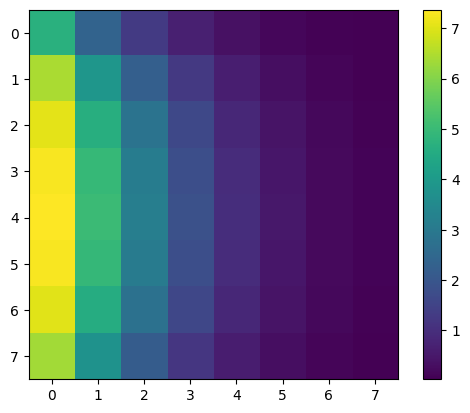

In [13]:
plt.imshow(measurements[10].reshape(8,8), interpolation='nearest')
plt.colorbar()

In [6]:
measurements.shape

(100, 64)

In [14]:
measurements = np.array([measurements[10, :]]) 
measurements = torch.from_numpy(measurements).float()
print(measurements.shape)  # shape: (timesteps, num_coords)


torch.Size([1, 64])


In [15]:
model = CustomGNN(input_dims=1, hidden_dims=[32, 32, 32, 32], output_dims=1, biases=True)

# Initialize environment and model
num_nodes = len(node_positions)
env = Environment(model, node_positions, k=4, device='cpu')


In [16]:
# Training loop
losses = env.train(measurements, 3_000, lr=1e-4, steps_btwn_data= 50)

C:\Users\jakob\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\loss.py:610: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 0: Loss = 9.290049
Epoch 10: Loss = 9.228226
Epoch 20: Loss = 9.166329
Epoch 30: Loss = 9.102450
Epoch 40: Loss = 9.035193
Epoch 50: Loss = 8.962651
Epoch 60: Loss = 8.885466
Epoch 70: Loss = 8.803609
Epoch 80: Loss = 8.718149
Epoch 90: Loss = 8.626698
Epoch 100: Loss = 8.528935
Epoch 110: Loss = 8.418633
Epoch 120: Loss = 8.283259
Epoch 130: Loss = 8.102904
Epoch 140: Loss = 7.848097
Epoch 150: Loss = 7.461899
Epoch 160: Loss = 6.859674
Epoch 170: Loss = 5.931012
Epoch 180: Loss = 5.592440
Epoch 190: Loss = 5.409452
Epoch 200: Loss = 5.433867
Epoch 210: Loss = 5.404307
Epoch 220: Loss = 5.403687
Epoch 230: Loss = 5.397542
Epoch 240: Loss = 5.393385
Epoch 250: Loss = 5.388777
Epoch 260: Loss = 5.386216
Epoch 270: Loss = 5.383176
Epoch 280: Loss = 5.380202
Epoch 290: Loss = 5.377283
Epoch 300: Loss = 5.374103
Epoch 310: Loss = 5.371160
Epoch 320: Loss = 5.368091
Epoch 330: Loss = 5.364985
Epoch 340: Loss = 5.361867
Epoch 350: Loss = 5.358759
Epoch 360: Loss = 5.355628
Epoch 370: L

In [8]:
model.get_weights()[0].shape

torch.Size([32, 3])

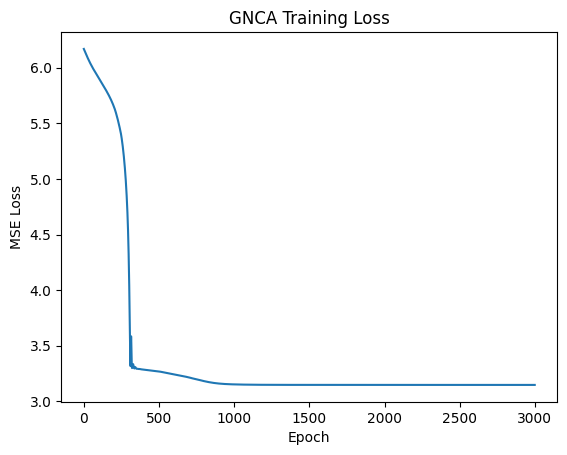

In [9]:
# Plot training loss
import matplotlib.pyplot as plt

for i in range(len(measurements)):
    plt.plot(losses[i::len(measurements)], label=f"t={i}")
# plt.plot(losses[1::4])
# plt.plot(losses[2::4])
# plt.plot(losses[3::4])
plt.xlabel('Epoch')
plt.ylabel('MSE Loss')
plt.title('GNCA Training Loss')
plt.show()

In [10]:
# Test the model using environment.test_model
output = env.test_model(measurements, steps_btwn_data = 20)


In [11]:
output = np.array(output)
print(output.shape)  # shape: (timesteps, num_coords)

(1, 64, 1)


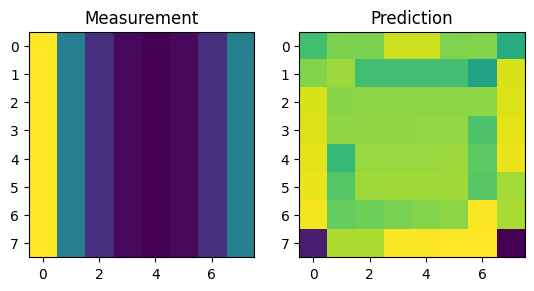

In [12]:
for out, measurement in zip(output, measurements):
    fig, ax = plt.subplots(1, 2)
    ax[0].set_title('Measurement')
    ax[0].imshow(measurement.reshape(8,8), interpolation='nearest')
    ax[1].set_title('Prediction')
    ax[1].imshow(out.reshape(8,8), interpolation='nearest')
    plt.show()

In [13]:
coords.shape

(64, 2)

In [14]:
output[0,:,0].shape

(64,)

In [17]:
edge_info

tensor([[ 0,  0,  0,  0,  1,  1,  1,  1,  2,  2,  2,  2,  3,  3,  3,  3,  4,  4,
          4,  4,  5,  5,  5,  5,  6,  6,  6,  6,  7,  7,  7,  7,  8,  8,  8,  8,
          9,  9,  9,  9, 10, 10, 10, 10, 11, 11, 11, 11, 12, 12, 12, 12, 13, 13,
         13, 13, 14, 14, 14, 14, 15, 15, 15, 15, 16, 16, 16, 16, 17, 17, 17, 17,
         18, 18, 18, 18, 19, 19, 19, 19, 20, 20, 20, 20, 21, 21, 21, 21, 22, 22,
         22, 22, 23, 23, 23, 23, 24, 24, 24, 24, 25, 25, 25, 25, 26, 26, 26, 26,
         27, 27, 27, 27, 28, 28, 28, 28, 29, 29, 29, 29, 30, 30, 30, 30, 31, 31,
         31, 31, 32, 32, 32, 32, 33, 33, 33, 33, 34, 34, 34, 34, 35, 35, 35, 35,
         36, 36, 36, 36, 37, 37, 37, 37, 38, 38, 38, 38, 39, 39, 39, 39, 40, 40,
         40, 40, 41, 41, 41, 41, 42, 42, 42, 42, 43, 43, 43, 43, 44, 44, 44, 44,
         45, 45, 45, 45, 46, 46, 46, 46, 47, 47, 47, 47, 48, 48, 48, 48, 49, 49,
         49, 49, 50, 50, 50, 50, 51, 51, 51, 51, 52, 52, 52, 52, 53, 53, 53, 53,
         54, 54, 54, 54, 55,

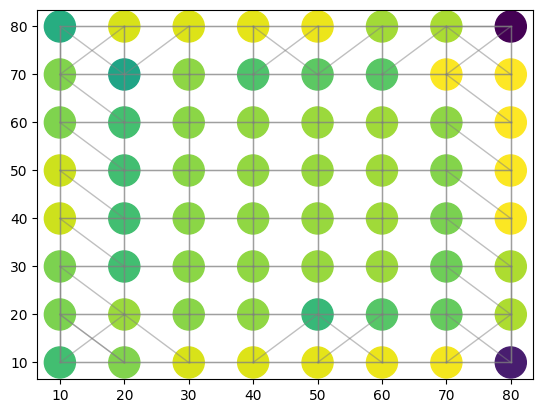

In [19]:
plt.scatter(coords[:, 0], coords[:, 1], c = output[0,:,0]/10., s = 500)
edge_info = env.edge_info
for i in range(edge_info.shape[1]):
    start_idx = edge_info[0, i].item()
    end_idx = edge_info[1, i].item()
    plt.plot(
        [coords[start_idx, 0], coords[end_idx, 0]],
        [coords[start_idx, 1], coords[end_idx, 1]],
        color='gray', linewidth=1, alpha=0.5
    )
plt.show()